# Looking at common events between the SEP data with the big database

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.dates import DateFormatter
import datetime as dt
from datetime import timedelta

In [2]:
# Reading in the dataframes
custom_df1 = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'
custom_df2 = 'C:/Users/Peter/py_projects/solar_stats/custom_sep.p'
df = pd.read_pickle(custom_df1)
sp = pd.read_pickle(custom_df2)

In [3]:
print(min(sp.start))
print(max(sp.start))
print('')
print(min(df.cme_time))
print(max(df.cme_time))

1997-11-04 08:30:00
2017-09-05 07:51:00

1996-08-01 12:36:35
2020-05-30 08:48:05


In [4]:
# Maybe start off by just looking at the SEP proton fluxes?
print(sp.proton_flux.isnull().sum())

0


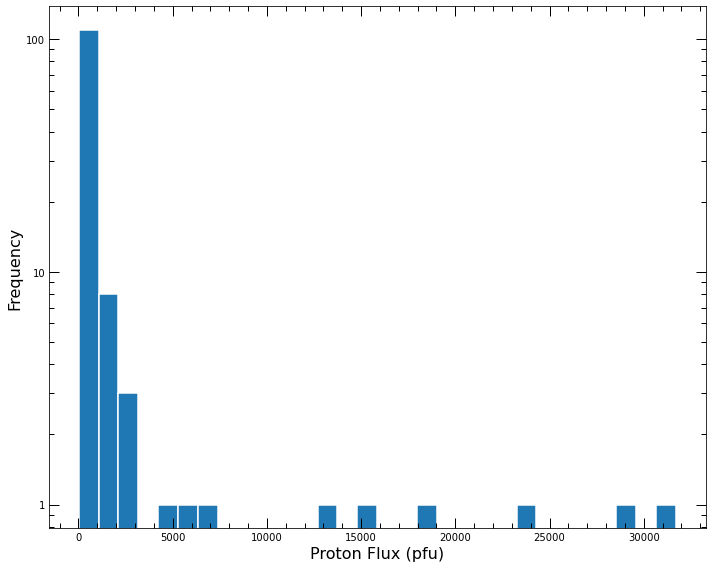

In [100]:
# proton fluxes histogram
fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')

ax.hist(sp.proton_flux, 30, ec='white', align='mid', lw=1.5)

ax.set_yscale('log')
#ax.set_ylim([1,150])
ax.set_yticks([1, 10, 100])
ax.set_yticklabels(['1', '10', '100'])

ax.set_xlabel('Proton Flux (pfu)', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)

ax.xaxis.set_minor_locator(MultipleLocator(1000))
ax.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1)
ax.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

plt.tight_layout()
#plt.savefig('pfu_hist.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

In [79]:
fl = sp[['proton_flux', 'flare_max']]
fl = fl.dropna(how='any')
fl = fl.reset_index(drop=True)

In [7]:
print(sp.importance.isnull().sum())

20


In [8]:
fl

,proton_flux,flare_max
0,72,1997-11-04 05:58:00
1,490,1997-11-06 11:55:00
2,1700,1998-04-20 10:21:00
3,150,1998-05-02 13:42:00
4,210,1998-05-06 08:09:00
...,...,...
107,22,2014-02-20 07:56:00
108,103,2014-02-25 00:49:00
109,16,2015-06-18 01:27:00
110,21,2016-01-02 00:11:00


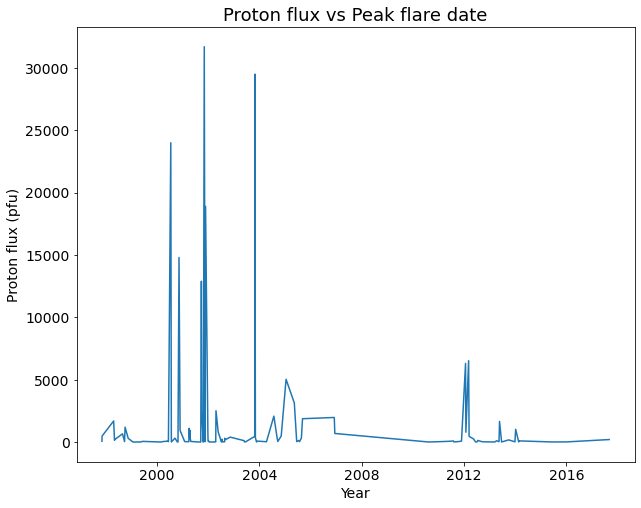

In [80]:
# plotting against the flare max dates
plt.figure(figsize=[10, 8], facecolor='white')

plt.plot(fl.flare_max, fl.proton_flux)
#plt.scatter(fl.flare_max, fl.proton_flux, c='r', s=10)
plt.title('Proton flux vs Peak flare date', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Proton flux (pfu)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#ax = plt.gca()
#date_form = DateFormatter("%Y")
#ax.xaxis.set_major_formatter(date_form)
#ax.xaxis.set_major_locator(MultipleLocator(10))

#plt.savefig('pfu_plot.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

In [10]:
print(min(sp.event_max))
print(max(sp.event_max))

1997-11-04 11:20:00
2017-09-05 19:30:00


In [11]:
# some cme properties with proton flux
cme = df[['cme_time', 'cme_speed', 'cme_kinetic_energy']]
cme = cme.dropna(how='any')
cme = cme[ (cme['cme_time'] >= dt.datetime(1997, 11, 4)) & (cme['cme_time'] <= dt.datetime(2017, 9, 6)) ] 
cme = cme.reset_index(drop=True)

In [12]:
# 2002 event has the highest proton flux
sp2 = sp[ (sp['event_max'] >= dt.datetime(2002, 1, 1)) & (sp['event_max'] < dt.datetime(2003, 1, 1)) ]

In [13]:
# Getting exact 2002 for cme2
cme2 = cme[ (cme['cme_time'] >= dt.datetime(2002, 1, 10)) & (cme['cme_time'] <= dt.datetime(2002, 11, 11)) ]

In [14]:
print(min(sp2.event_max))
print(max(sp2.event_max))
print()
print(min(cme2.cme_time))
print(max(cme2.cme_time))
print()
print(len(sp2.event_max))
print(len(cme2.cme_time))

2002-01-11 05:30:00
2002-11-10 05:40:00

2002-01-10 00:30:05
2002-11-10 23:54:05

19
998


In [15]:
# found this online to find the value in the 'items' column closest to the 'pivot' value
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

In [16]:
# Finding all the nearest values for the cme_time to the SEP event_max 
both = np.zeros(len(sp2.event_max))
both = both.astype('O')
for i in range(len(both)):
    both[i] = nearest(cme2.cme_time, sp2.event_max.iloc[i])

In [17]:
# Now getting the indices for these nearest values
idx = np.zeros(len(both))
for i in range(len(idx)):
    a = cme2['cme_time'].index[cme2.cme_time==both[i]].tolist()
    idx[i] = a[0]

In [18]:
cme2.cme_time.loc[idx]

3605.0   2002-01-11 03:30:32
3618.0   2002-01-14 08:35:05
3698.0   2002-02-20 06:30:05
3792.0   2002-03-17 08:30:05
3798.0   2002-03-19 09:54:24
3800.0   2002-03-20 14:54:05
3804.0   2002-03-22 11:54:05
3892.0   2002-04-17 16:26:05
3900.0   2002-04-23 00:50:05
4007.0   2002-05-24 03:50:05
4139.0   2002-07-07 18:06:08
4157.0   2002-07-18 07:31:51
4160.0   2002-07-19 16:30:05
4163.0   2002-07-23 10:31:47
4239.0   2002-08-14 18:30:05
4263.0   2002-08-22 03:50:07
4273.0   2002-08-24 06:13:00
4334.0   2002-09-07 16:30:05
4597.0   2002-11-10 08:30:05
Name: cme_time, dtype: datetime64[ns]

In [19]:
# Now to keep only the corresponding data for these entries
cme3 = cme2.loc[idx]
cme3

,cme_time,cme_speed,cme_kinetic_energy
3605.0,2002-01-11 03:30:32,254.0,2.200000e+29
3618.0,2002-01-14 08:35:05,489.0,9.900000e+28
3698.0,2002-02-20 06:30:05,952.0,9.500000e+30
3792.0,2002-03-17 08:30:05,230.0,6.300000e+28
3798.0,2002-03-19 09:54:24,722.0,2.000000e+31
3800.0,2002-03-20 14:54:05,440.0,3.800000e+29
3804.0,2002-03-22 11:54:05,191.0,1.300000e+29
3892.0,2002-04-17 16:26:05,400.0,3.600000e+30
3900.0,2002-04-23 00:50:05,286.0,5.300000e+29
4007.0,2002-05-24 03:50:05,426.0,1.100000e+30


In [20]:
sp2.event_max.dtype

dtype('<M8[ns]')

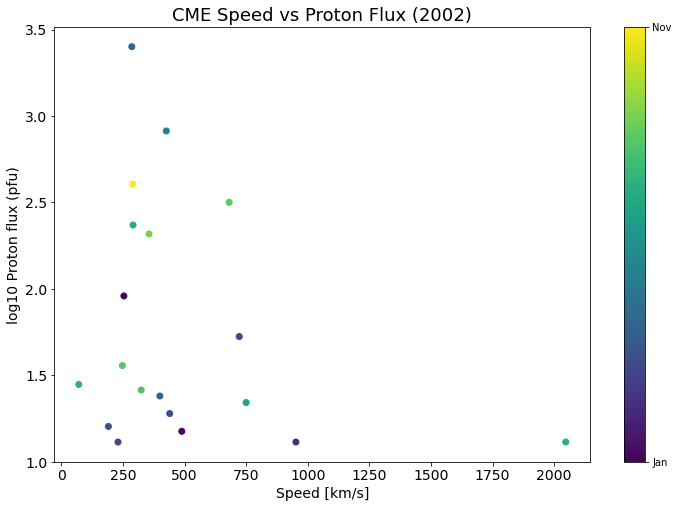

In [83]:
# plotting
plt.figure(figsize=[12, 8], facecolor='white')

plt.scatter(cme3.cme_speed, np.log10(sp2.proton_flux), c=sp2.event_max)
#plt.scatter(sp2.proton_flux, cme3.cme_speed, c=sp2.event_max)
plt.title('CME Speed vs Proton Flux (2002)', fontsize=18)
plt.xlabel('Speed [km/s]', fontsize=14)
plt.ylabel('log10 Proton flux (pfu)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yscale('log')
#cbar = plt.colorbar()

cbar = plt.colorbar(orientation='vertical', shrink=1, ticks=[1.0369E18, 1.01073E18])
cbar.ax.set_yticklabels(['Nov', 'Jan'])

#cbar = plt.colorbar(orientation='vertical', shrink=1, ticks=[min(sp2.event_max), max(sp2.event_max)])
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y %b %d/%H%M'))

#plt.savefig('speed_pfu_2002.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

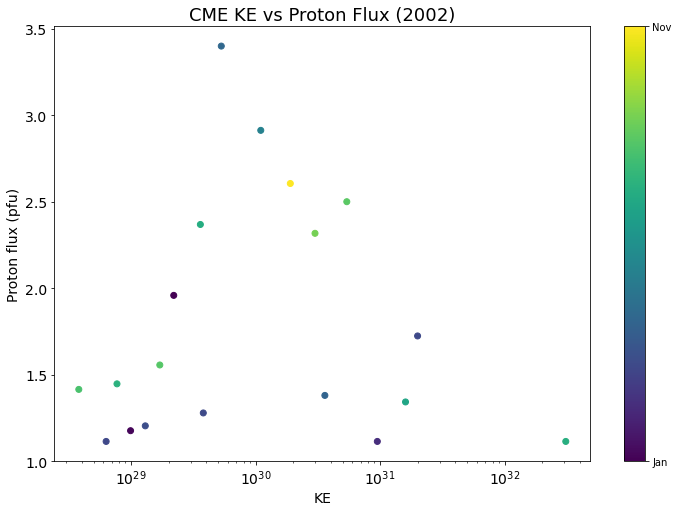

In [88]:
# plotting
plt.figure(figsize=[12, 8], facecolor='white')

plt.scatter(cme3.cme_kinetic_energy, np.log10(sp2.proton_flux), c=sp2.event_max)
plt.title('CME KE vs Proton Flux (2002)', fontsize=18)
plt.xlabel('KE', fontsize=14)
plt.ylabel('Proton flux (pfu)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
#cbar = plt.colorbar()

cbar = plt.colorbar(orientation='vertical', shrink=1, ticks=[1.0369E18, 1.01073E18])
cbar.ax.set_yticklabels(['Nov', 'Jan'])

#cbar = plt.colorbar(orientation='vertical', shrink=1, ticks=[min(sp2.event_max), max(sp2.event_max)])
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y %b %d/%H%M'))

#plt.savefig('ke_pfu_2002.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

In [23]:
#jammy code

'''
if ((sp2.event_max.iloc[0] + timedelta(hours=3)) | (sp2.event_max.iloc[0] - timedelta(hours=3)))

idx = cme2.cme_time.iloc[0].get_loc(sp2.event_max.iloc[0], method='nearest')

if (sp2.event_max.iloc[0] - timedelta(hours=3)) <= cme2.cme_time.iloc[0] <= (sp2.event_max.iloc[0] + timedelta(hours=3)):
    print('yes')
else:
    print('no')
'''

"\nif ((sp2.event_max.iloc[0] + timedelta(hours=3)) | (sp2.event_max.iloc[0] - timedelta(hours=3)))\n\nidx = cme2.cme_time.iloc[0].get_loc(sp2.event_max.iloc[0], method='nearest')\n\nif (sp2.event_max.iloc[0] - timedelta(hours=3)) <= cme2.cme_time.iloc[0] <= (sp2.event_max.iloc[0] + timedelta(hours=3)):\n    print('yes')\nelse:\n    print('no')\n"

# Okay, this has served as a good enough test. Should now do for all SEP data so that we have more datapoint

In [89]:
# properties to look at
fls = df[['cme_time', 'flare_peak_time', 'cme_speed', 'cme_kinetic_energy']]
fls = fls.dropna(how='any')
fls = fls[ (fls['cme_time'] >= dt.datetime(1997, 11, 4)) & (fls['cme_time'] <= dt.datetime(2017, 9, 6)) ] 
fls = fls.reset_index(drop=True)

In [90]:
print(sp.flare_max.isnull().sum())

17


In [91]:
spf = sp[['proton_flux', 'flare_max']]
spf = spf.dropna(how='any')
spf = spf.reset_index(drop=True)

In [92]:
# Finding all the nearest values for the flare_peak_time to the SEP flare_max 
both2 = (np.zeros(len(spf.flare_max))).astype('O')
for i in range(len(both2)):
    both2[i] = nearest(fls.flare_peak_time, spf.flare_max.iloc[i])

In [93]:
len(both2)

112

In [94]:
# Now getting the indices for these nearest values
idxb = np.zeros(len(both2))
for i in range(len(idxb)):
    b = fls['flare_peak_time'].index[fls.flare_peak_time==both2[i]].tolist()
    idxb[i] = b[0]

In [95]:
fls.flare_peak_time.loc[idxb]

0.0       1997-11-04 05:58:00
2.0       1997-11-06 11:55:00
56.0      1998-04-23 05:55:00
65.0      1998-05-02 13:42:00
72.0      1998-05-06 08:09:00
                  ...        
8657.0    2014-02-20 07:56:00
8679.0    2014-02-25 00:49:00
10645.0   2015-06-18 01:27:00
11124.0   2016-01-01 22:30:00
11615.0   2017-09-04 20:02:00
Name: flare_peak_time, Length: 112, dtype: datetime64[ns]

In [96]:
# Now to keep only the corresponding data for these entries
fls2 = fls.loc[idxb]
fls2

,cme_time,flare_peak_time,cme_speed,cme_kinetic_energy
0.0,1997-11-04 06:10:05,1997-11-04 05:58:00,785.0,2.300000e+31
2.0,1997-11-06 12:10:41,1997-11-06 11:55:00,1556.0,6.600000e+31
56.0,1998-04-23 05:55:22,1998-04-23 05:55:00,1691.0,7.900000e+31
65.0,1998-05-02 14:06:12,1998-05-02 13:42:00,938.0,3.400000e+31
72.0,1998-05-06 08:29:13,1998-05-06 08:09:00,1099.0,1.800000e+32
...,...,...,...,...
8657.0,2014-02-20 08:00:07,2014-02-20 07:56:00,948.0,3.900000e+31
8679.0,2014-02-25 01:25:50,2014-02-25 00:49:00,2147.0,5.100000e+32
10645.0,2015-06-18 01:25:50,2015-06-18 01:27:00,1714.0,1.500000e+32
11124.0,2016-01-01 23:24:04,2016-01-01 22:30:00,1730.0,1.100000e+32


In [97]:
max(spf.flare_max)

Timestamp('2017-09-04 20:33:00')

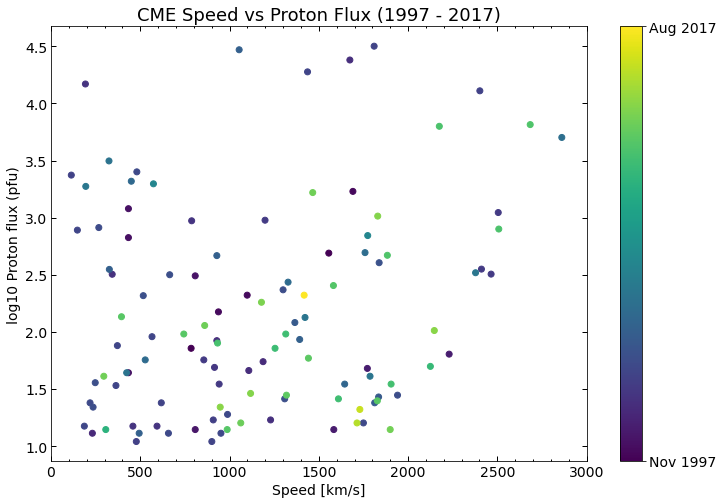

In [98]:
# plotting
fig, ax = plt.subplots(figsize=[12, 8], facecolor='white')

sct = ax.scatter(fls2.cme_speed, np.log10(spf.proton_flux), c=spf.flare_max)
ax.set_title('CME Speed vs Proton Flux (1997 - 2017)', fontsize=18)
ax.set_xlabel('Speed [km/s]', fontsize=14)
ax.set_ylabel('log10 Proton flux (pfu)', fontsize=14)

ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_xlim([0,3000])

ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.tick_params(axis='both', length=5, top=True, right=True, direction='in', width=1)
ax.tick_params(axis='both', length=2, top=True, right=True, direction='in', which='minor', width=1)

cbar = plt.colorbar(sct, orientation='vertical', shrink=1, ticks=[0.879E18, 1.5045E18])
cbar.ax.set_yticklabels(['Nov 1997', 'Aug 2017'], fontsize=14)

#plt.savefig('speed_pfu.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()